In [40]:
import statsmodels.api as sm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from statsmodels.formula.api import poisson
import statsmodels.formula.api as smf

In [41]:
df = pd.read_csv("data/jenny/final_preprocessed.csv")
df.head(3)

,date,month,year,Temp,Flow,Level,count,october_Flow,november_Flow,december_Temp,...,rolling_Level_mean_5,rolling_Temp_std_15,rolling_Temp_std_10,rolling_Temp_std_5,rolling_Flow_std_15,rolling_Flow_std_10,rolling_Flow_std_5,rolling_Level_std_15,rolling_Level_std_10,rolling_Level_std_5
0,2013-09-02,9,2013,19.127273,0.8755,0.5480,0.0,7.679129,28.3825,3.965188,...,0.8237,2.160008,1.950006,1.571429,2.041962,1.416962,0.74561,0.060489,0.042766,0.024903
1,2013-09-03,9,2013,18.045833,0.7905,0.5405,0.0,7.679129,28.3825,3.965188,...,0.8237,2.160008,1.950006,1.571429,2.041962,1.416962,0.74561,0.060489,0.042766,0.024903
2,2013-09-04,9,2013,17.062500,0.7490,0.5365,0.0,7.679129,28.3825,3.965188,...,0.8237,2.160008,1.950006,1.571429,2.041962,1.416962,0.74561,0.060489,0.042766,0.024903


In [42]:
df.columns

Index(['date', 'month', 'year', 'Temp', 'Flow', 'Level', 'count',
       'october_Flow', 'november_Flow', 'december_Temp', 'january_Temp',
       'feburary_Temp', 'october_Level', 'november_Level',
       'rolling_Temp_mean_15', 'rolling_Temp_mean_10', 'rolling_Temp_mean_5',
       'rolling_Flow_mean_15', 'rolling_Flow_mean_10', 'rolling_Flow_mean_5',
       'rolling_Level_mean_15', 'rolling_Level_mean_10',
       'rolling_Level_mean_5', 'rolling_Temp_std_15', 'rolling_Temp_std_10',
       'rolling_Temp_std_5', 'rolling_Flow_std_15', 'rolling_Flow_std_10',
       'rolling_Flow_std_5', 'rolling_Level_std_15', 'rolling_Level_std_10',
       'rolling_Level_std_5'],
      dtype='object')

In [51]:
def split_test_train(df, year=2023, summer_months=False):
      if summer_months:
            df = df[df["month"].isin([4,5,6,7,8])]
      train = df[df["year"] < year]
      test = df[df["year"] >= year]
      return train, test

train, test = split_test_train(df, year=2022, summer_months=True)
print(train.shape[0], test.shape[0])

1224 306


In [52]:
formula = "count ~ october_Flow + november_Flow + december_Temp + january_Temp + feburary_Temp \
            + october_Level + november_Level + rolling_Temp_mean_15 + rolling_Temp_std_15 + rolling_Level_mean_15 \
            + rolling_Level_std_15 + rolling_Flow_mean_15 + rolling_Flow_std_15"

In [53]:
poisson_model = poisson(formula, data=train).fit()

Optimization terminated successfully.
         Current function value: 86.381392
         Iterations 9


In [54]:
print(poisson_model.summary())

                          Poisson Regression Results                          
Dep. Variable:                  count   No. Observations:                 1224
Model:                        Poisson   Df Residuals:                     1210
Method:                           MLE   Df Model:                           13
Date:                Mon, 17 Jun 2024   Pseudo R-squ.:                  0.2678
Time:                        23:43:01   Log-Likelihood:            -1.0573e+05
converged:                       True   LL-Null:                   -1.4440e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept               -24.2081      0.199   -121.803      0.000     -24.598     -23.819
october_Flow              0.3628      0.003    112.266      0.000       0.357       0.369
november

In [55]:
pred = poisson_model.predict(test)
test["pred"] = pred
pred

3132     0.014283
3133     0.006482
3134     0.004634
3135     0.004576
3136     0.004876
          ...    
3645    62.216781
3646    63.177961
3647    63.107495
3648    61.250261
3649    58.180555
Length: 306, dtype: float64

In [58]:
exog_vars = df.iloc[:,7:].columns.tolist()
exog_vars

['october_Flow',
 'november_Flow',
 'december_Temp',
 'january_Temp',
 'feburary_Temp',
 'october_Level',
 'november_Level',
 'rolling_Temp_mean_15',
 'rolling_Temp_mean_10',
 'rolling_Temp_mean_5',
 'rolling_Flow_mean_15',
 'rolling_Flow_mean_10',
 'rolling_Flow_mean_5',
 'rolling_Level_mean_15',
 'rolling_Level_mean_10',
 'rolling_Level_mean_5',
 'rolling_Temp_std_15',
 'rolling_Temp_std_10',
 'rolling_Temp_std_5',
 'rolling_Flow_std_15',
 'rolling_Flow_std_10',
 'rolling_Flow_std_5',
 'rolling_Level_std_15',
 'rolling_Level_std_10',
 'rolling_Level_std_5']

,month,year,Temp,Flow,Level,count,october_Flow,november_Flow,december_Temp,january_Temp,...,rolling_Temp_std_10,rolling_Temp_std_5,rolling_Flow_std_15,rolling_Flow_std_10,rolling_Flow_std_5,rolling_Level_std_15,rolling_Level_std_10,rolling_Level_std_5,pred,pred_adjust
date,,,,,,,,,,,,,,,,,,,,,
2022-04-01,4,2022,5.879167,13.550000,1.0085,0.0,23.103871,66.455,1.127608,2.843952,...,3.676482,4.173663,16.783758,20.281446,25.797438,0.292805,0.355750,0.448786,0.014283,0.014283
2022-04-02,4,2022,7.916667,12.605000,0.9875,0.0,23.103871,66.455,1.127608,2.843952,...,3.983490,3.283335,19.117465,22.467249,24.114861,0.330600,0.390746,0.407586,0.006482,0.006482
2022-04-03,4,2022,7.845833,14.540000,1.0335,0.0,23.103871,66.455,1.127608,2.843952,...,4.105282,0.896265,19.566483,22.314789,17.343897,0.342530,0.392192,0.266934,0.004634,0.004634
2022-04-04,4,2022,6.104167,64.000000,1.8390,0.0,23.103871,66.455,1.127608,2.843952,...,4.047577,0.905017,19.399404,21.487138,13.864190,0.342162,0.377617,0.195797,0.004576,0.004576
2022-04-05,4,2022,6.875000,49.699999,1.6860,0.0,23.103871,66.455,1.127608,2.843952,...,3.259610,1.430697,19.135100,20.563615,14.793470,0.337658,0.356073,0.214766,0.004876,0.004876


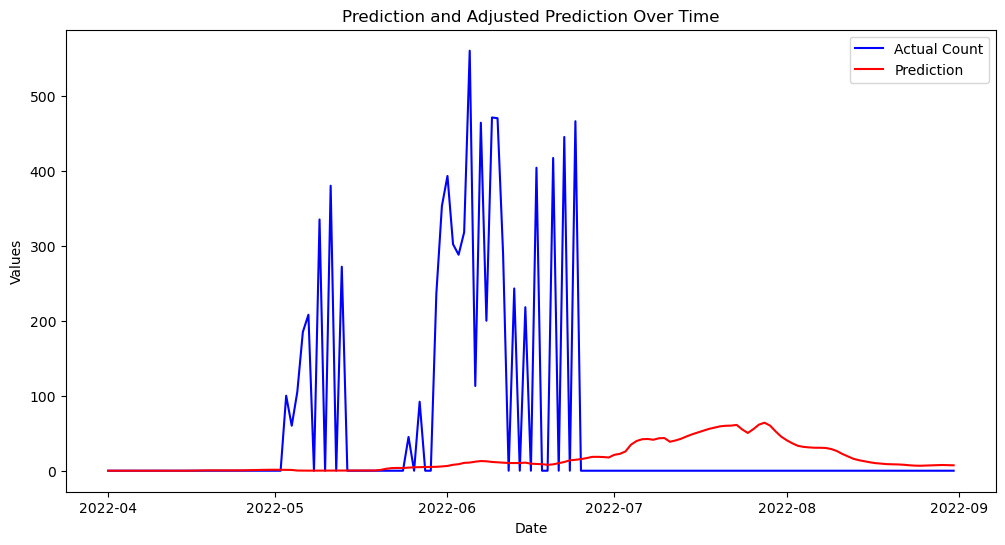

In [56]:
def plot_model(df, subset_year=None):
      df['date'] = pd.to_datetime(df['date'])
      df = df.set_index("date")
      
      if subset_year != None:
            df = df[df["year"] == subset_year]
      adjust_val = lambda row: 0 if row["pred"] <= 0 else row["pred"]
      if "pred_adjust" not in df.columns.tolist():
            df["pred_adjust"] = df.apply(adjust_val, axis=1)
      display(df.head())

      plt.figure(figsize=(12, 6))
      plt.plot(df.index, df['count'], label='Actual Count', color='blue')
      plt.plot(df.index, df['pred_adjust'], label='Prediction', color='red')

      plt.title('Prediction and Adjusted Prediction Over Time')
      plt.xlabel('Date')
      plt.ylabel('Values')

      plt.legend()
      plt.show()

plot_model(test, 2022)